In [2]:
import os
cwd = os.getcwd()
print(os.listdir(f'{cwd}/input'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [3]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [7]:
!pip install opencv-python tqdm

In [17]:
# Initialize X and Y array
X=[]
Y=[]

# Define resized image size
IMG_SIZE=150

# Define flower 
FLOWER_DAISY_DIR=f'{cwd}/input/daisy'
FLOWER_SUNFLOWER_DIR=f'{cwd}/input/sunflower'
FLOWER_TULIP_DIR=f'{cwd}/input/tulip'
FLOWER_DANDI_DIR=f'{cwd}/input/dandelion'
FLOWER_ROSE_DIR=f'{cwd}/input/rose'

In [18]:
def make_train_data(flower_type,DIR):
    # Loop through all 
    for img in tqdm(os.listdir(DIR)):
        # Assign label as the flower type
        label = flower_type
        
        # Get image path
        path = os.path.join(DIR,img)
        
        # Use OpenCV to read the image and resize it
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        # Append the image after reading it
        X.append(np.array(img))
        Y.append(str(label))

In [19]:
# Create training data and labels
make_train_data('Daisy',FLOWER_DAISY_DIR)
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
make_train_data('Tulip',FLOWER_TULIP_DIR)
make_train_data('Dandelion',FLOWER_DANDI_DIR)
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 784/784 [00:01<00:00, 582.78it/s]

4317


In [20]:
X[1].shape

(150, 150, 3)

In [21]:
X[1]

array([[[224, 216, 215],
        [220, 213, 209],
        [226, 217, 214],
        ...,
        [ 14,   9,   9],
        [ 17,  11,  12],
        [ 12,   7,   8]],

       [[225, 217, 216],
        [231, 223, 221],
        [224, 216, 215],
        ...,
        [ 15,  12,  13],
        [ 13,   7,   9],
        [ 12,   8,   7]],

       [[235, 227, 227],
        [231, 223, 220],
        [229, 223, 222],
        ...,
        [ 16,  14,  14],
        [ 13,   7,   9],
        [  8,   4,   3]],

       ...,

       [[182, 176, 177],
        [188, 183, 184],
        [202, 198, 194],
        ...,
        [138, 154, 160],
        [159, 169, 174],
        [166, 172, 182]],

       [[221, 216, 212],
        [228, 224, 216],
        [230, 226, 221],
        ...,
        [136, 153, 162],
        [159, 171, 179],
        [162, 170, 180]],

       [[237, 231, 229],
        [235, 228, 225],
        [241, 236, 232],
        ...,
        [138, 152, 161],
        [155, 171, 179],
        [160, 166, 179]]

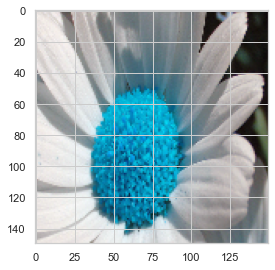

In [22]:
# Show one image
plt.imshow(X[1])
plt.show()

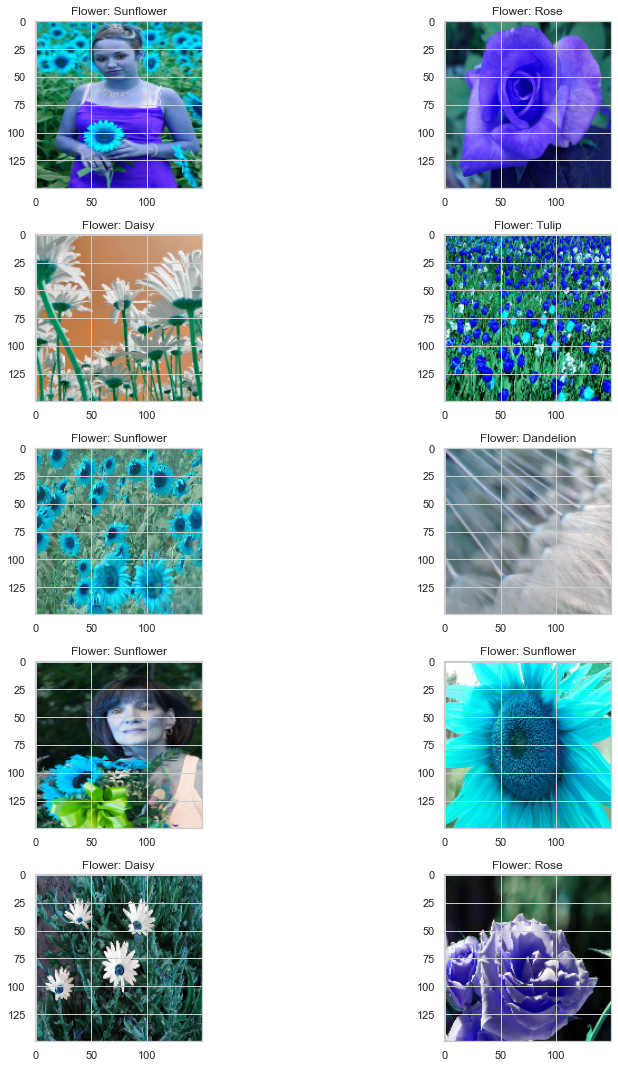

In [23]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Y[l])
        
plt.tight_layout()

In [24]:
Y

['Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',


In [25]:
# Convert labels from text to numbers
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [26]:
np.unique(Y)

array([0, 1, 2, 3, 4], dtype=int64)

In [27]:
# One hot encode the labels
Y=to_categorical(Y,len(np.unique(Y)))
Y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [28]:
# Normalize the image by dividing by 255. 
# Normalize makes computing easier. Pixel value range from 0 to 256, apart from 0 to 255
# This convert all image to range from 0 to 1
X=np.array(X)
X=X/255
X

array([[[[0.5254902 , 0.53333333, 0.53333333],
         [0.56078431, 0.56470588, 0.56470588],
         [0.57647059, 0.57647059, 0.57647059],
         ...,
         [0.58823529, 0.59607843, 0.59607843],
         [0.59607843, 0.60392157, 0.60392157],
         [0.59607843, 0.59607843, 0.59607843]],

        [[0.51764706, 0.5254902 , 0.5254902 ],
         [0.55686275, 0.56078431, 0.56078431],
         [0.57254902, 0.57254902, 0.57254902],
         ...,
         [0.58823529, 0.59607843, 0.59607843],
         [0.59215686, 0.6       , 0.6       ],
         [0.59215686, 0.59215686, 0.59215686]],

        [[0.51372549, 0.5254902 , 0.5254902 ],
         [0.54509804, 0.55294118, 0.55686275],
         [0.56862745, 0.56470588, 0.57254902],
         ...,
         [0.59607843, 0.60392157, 0.60392157],
         [0.58823529, 0.59215686, 0.59215686],
         [0.57647059, 0.57647059, 0.57647059]],

        ...,

        [[0.10196078, 0.18431373, 0.17254902],
         [0.09803922, 0.18039216, 0.16862745]

In [32]:
X[1].shape

(150, 150, 3)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [31]:
# Set random seeds
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [73]:
# Sequential model
model = Sequential()

# Convolution layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = X[1].shape))
# Max pooling: downscale image by extracting most important feature. Remove invariance like shift, rotational and scale 
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Use flatten to convert all the resultant 2-D arrays from pooled feature maps into a single long continuous linear vector so 
# that we can pass it to a dense layer to classify it
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [74]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 18, 18, 96)      

In [76]:
batch_size=128
epochs=30

history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/30
27/27 [==============================] - 42s 2s/step - loss: 1.5135 - accuracy: 0.3446 - val_loss: 1.2415 - val_accuracy: 0.4734
Epoch 2/30
27/27 [==============================] - 45s 2s/step - loss: 1.1724 - accuracy: 0.5056 - val_loss: 1.0785 - val_accuracy: 0.5208
Epoch 3/30
27/27 [==============================] - 43s 2s/step - loss: 1.0455 - accuracy: 0.5778 - val_loss: 0.9524 - val_accuracy: 0.6204
Epoch 4/30
27/27 [==============================] - 42s 2s/step - loss: 0.9470 - accuracy: 0.6281 - val_loss: 1.0001 - val_accuracy: 0.5891
Epoch 5/30
27/27 [==============================] - 41s 2s/step - loss: 0.8801 - accuracy: 0.6568 - val_loss: 0.9030 - val_accuracy: 0.6100
Epoch 6/30
27/27 [==============================] - 41s 2s/step - loss: 0.8064 - accuracy: 0.6887 - val_loss: 0.8667 - val_accuracy: 0.6400
Epoch 7/30
27/27 [==============================] - 42s 2s/step - loss: 0.7577 - accuracy: 0.7116 - val_loss: 0.9323 - val_accuracy: 0.6123
Epoch 8/30
27/27 [==

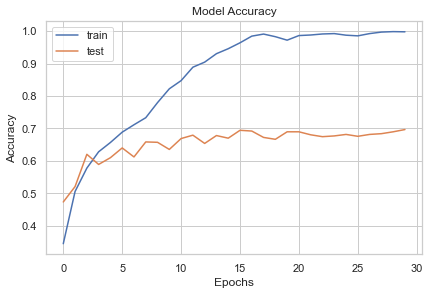

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [78]:
y_pred=model.predict(x_test)
y_pred

array([[1.0412460e-02, 3.1109008e-07, 4.0181321e-01, 5.8775729e-01,
        1.6739103e-05],
       [1.3158770e-01, 8.7952538e-04, 1.5768116e-02, 1.7717425e-03,
        8.4999293e-01],
       [5.6804524e-06, 2.2360434e-16, 8.3307503e-03, 2.2442484e-11,
        9.9166358e-01],
       ...,
       [1.4552734e-06, 8.0925929e-06, 8.4135495e-04, 8.5878884e-13,
        9.9914908e-01],
       [2.7673590e-08, 2.4376527e-12, 1.9427013e-02, 1.1175123e-09,
        9.8057300e-01],
       [4.4306973e-04, 4.1758726e-06, 8.3591876e-05, 9.9944252e-01,
        2.6696936e-05]], dtype=float32)

Text(0, 0.5, 'True Positive Rate')

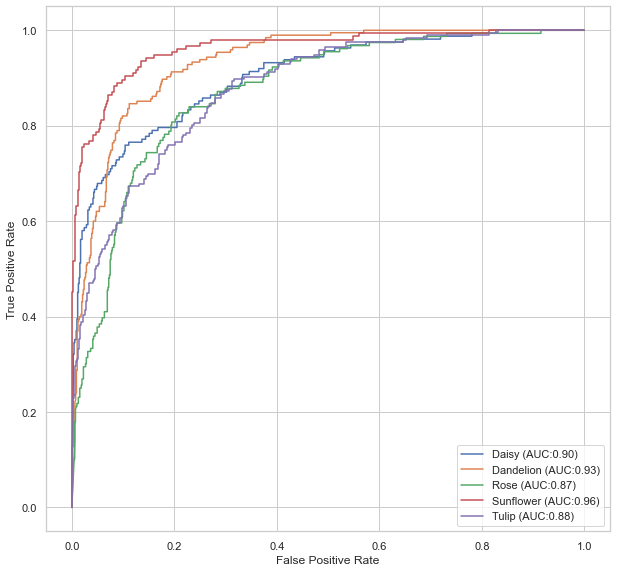

In [79]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for i in range(5):
    fpr, tpr, thresholds = roc_curve(y_test[:,i].astype(int), y_pred[:,i])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (le.inverse_transform([i])[0], auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

In [80]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred)

0.9093529357528952

# Use image data generator

The ImageDataGenerator class allows your model to receive new variations of the images at each epoch. It allows the model to become invariant to the orientation of the object. It lets you augment your images in real-time while your model is still training! You can apply any random transformations on each training image as it is passed to the model. This will not only make your model robust but will also save up on the overhead memory!

These image augmentation techniques not only expand the size of your dataset but also incorporate a level of variation in the dataset which allows your model to generalize better on unseen data. Also, the model becomes more robust when it is trained on new, slightly altered images.

In [81]:
# Sequential model
model = Sequential()

# Convolution layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = X[1].shape))
# Max pooling: downscale image by extracting most important feature. Remove invariance like shift, rotational and scale 
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Use flatten to convert all the resultant 2-D arrays from pooled feature maps into a single long continuous linear vector so 
# that we can pass it to a dense layer to classify it
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [82]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [83]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/30
26/26 [==============================] - 45s 2s/step - loss: 1.4128 - accuracy: 0.3705 - val_loss: 1.1116 - val_accuracy: 0.5150
Epoch 2/30
26/26 [==============================] - 45s 2s/step - loss: 1.1261 - accuracy: 0.5453 - val_loss: 0.9672 - val_accuracy: 0.6134
Epoch 3/30
26/26 [==============================] - 45s 2s/step - loss: 1.0328 - accuracy: 0.5874 - val_loss: 0.9756 - val_accuracy: 0.5961
Epoch 4/30
26/26 [==============================] - 44s 2s/step - loss: 0.9708 - accuracy: 0.6235 - val_loss: 0.8961 - val_accuracy: 0.6319
Epoch 5/30
26/26 [==============================] - 46s 2s/step - loss: 0.9394 - accuracy: 0.6322 - val_loss: 0.9088 - val_accuracy: 0.6400
Epoch 6/30
26/26 [==============================] - 46s 2s/step - loss: 0.9004 - accuracy: 0.6463 - val_loss: 0.8276 - val_accuracy: 0.6551
Epoch 7/30
26/26 [==============================] - 48s 2s/step - loss: 0.8670 - accuracy: 0.6617 - val_loss: 0.7807 - val_accuracy: 0.6852
Epoch 8/30
26/26 [==

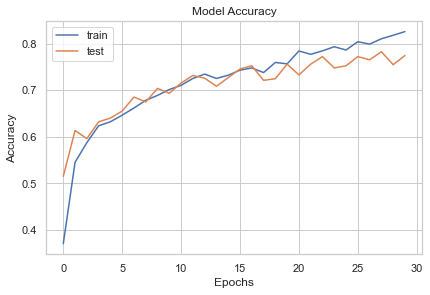

In [85]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [86]:
y_pred=model.predict(x_test)
y_pred

array([[1.6723560e-01, 9.9351676e-03, 7.8650630e-01, 9.9091781e-03,
        2.6413742e-02],
       [1.3485134e-01, 1.7699625e-01, 5.1784754e-01, 1.0474823e-02,
        1.5983011e-01],
       [1.1949928e-03, 2.4152275e-04, 1.4257778e-01, 8.7058377e-03,
        8.4727991e-01],
       ...,
       [1.0105627e-02, 2.4125641e-03, 5.4690763e-02, 7.2834967e-04,
        9.3206269e-01],
       [2.2019244e-04, 1.5745456e-05, 1.1097977e-03, 6.9087424e-04,
        9.9796343e-01],
       [1.0834353e-03, 2.5259161e-03, 3.2839857e-03, 9.9079680e-01,
        2.3097487e-03]], dtype=float32)

Text(0, 0.5, 'True Positive Rate')

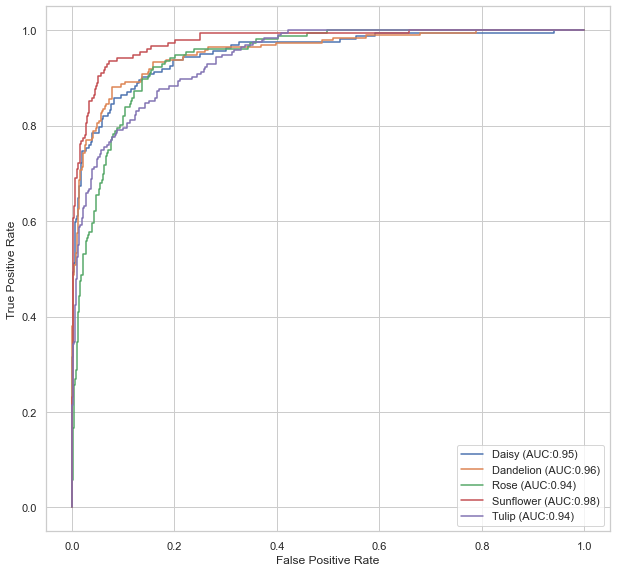

In [87]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for i in range(5):
    fpr, tpr, thresholds = roc_curve(y_test[:,i].astype(int), y_pred[:,i])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (le.inverse_transform([i])[0], auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

In [88]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred)

0.9534210250999289

In [89]:
y_pred_digits=np.argmax(y_pred,axis=1)

In [110]:
# Correctly predicted class
i=0
prop_class=[]


for i in range(len(y_test)):
    if(np.argmax(y_test[i])==y_pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

# Incorrectly predicted class
mis_class=[]
i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==y_pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break        

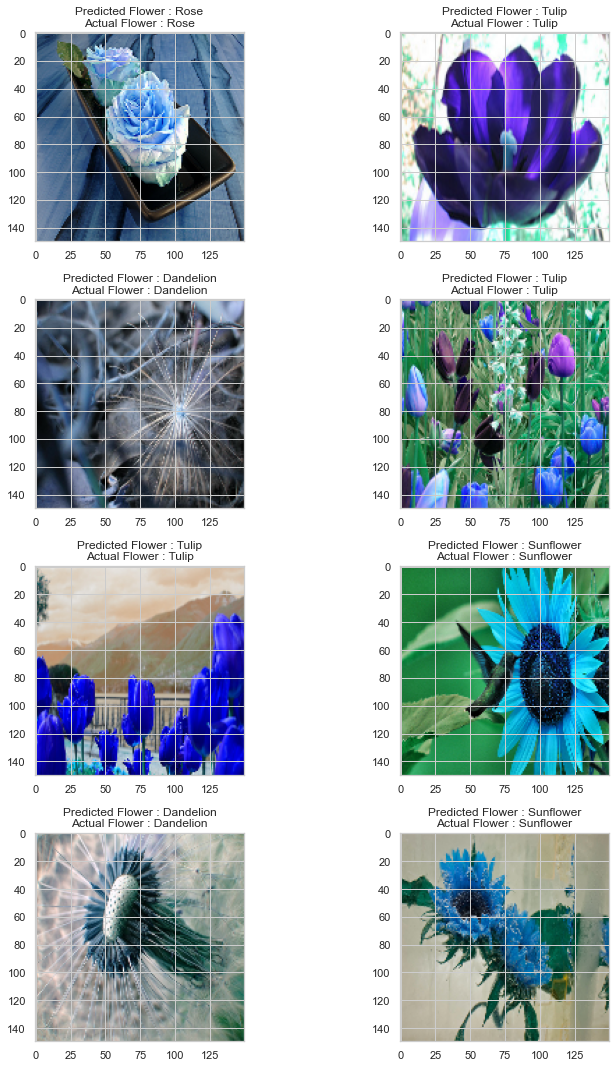

In [111]:
# Visualize correctly predicted class
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([y_pred_digits[prop_class[count]]])[0])
                          +"\n"+"Actual Flower : "
                          +str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])[0]))
        plt.tight_layout()
        count+=1

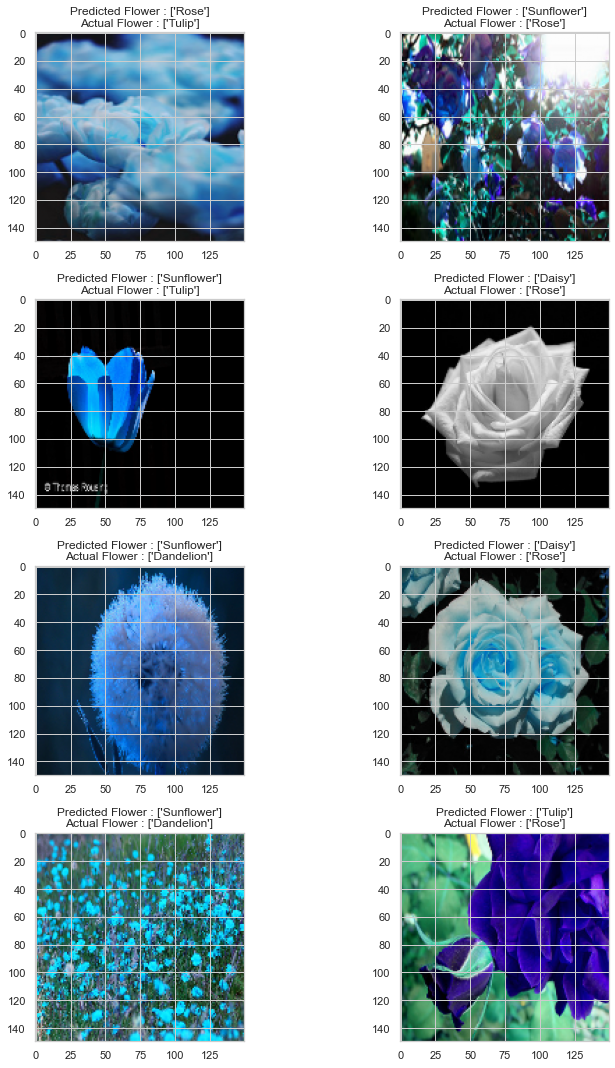

In [112]:
# Visualize incorrectly predicted class
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([y_pred_digits[mis_class[count]]]))
                          +"\n"+"Actual Flower : "
                          +str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1

# Transfer Learning

Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem

It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

The basic premise of transfer learning is simple: take a model trained on a large dataset and transfer its knowledge to a smaller dataset. For object recognition with a CNN, we freeze the early convolutional layers of the network and only train the last few layers which make a prediction

The model uses transfer learning by taking the first layers of a VGG16 model trained on ImageNet data (classifying color images of dogs, airplanes, cats, ...) and retrains it on the flower dataset

### VGG16

In [113]:
from keras.applications.vgg16 import VGG16

Average pooling method smooths out the image and hence the sharp features may not be identified when this pooling method is used. Max pooling selects the brighter pixels from the image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image.

In [114]:
# Include_top lets you select if you want the final dense layers or not from the pretrained model.
#Instantiate a base model and load pre-trained weights into it. 
base_model = VGG16(include_top=False, weights='imagenet',input_shape=(150,150,3), pooling='avg')

#Freeze all layers in the base model by setting trainable = False .
base_model.trainable = False

58900480/58889256 [==============================] - 2s 0us/step


In [115]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [116]:
model=Sequential()

# Add the pretrained model
model.add(base_model)

# Add the customized final layers
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [117]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [118]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 14,847,301
Trainable params: 132,613
Non-trainable params: 14,714,688
_________________________________________________________________


In [119]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/30
26/26 [==============================] - 119s 5s/step - loss: 1.2920 - accuracy: 0.5101 - val_loss: 1.0022 - val_accuracy: 0.6250
Epoch 2/30
26/26 [==============================] - 119s 5s/step - loss: 0.8929 - accuracy: 0.6734 - val_loss: 0.7792 - val_accuracy: 0.7292
Epoch 3/30
26/26 [==============================] - 121s 5s/step - loss: 0.7567 - accuracy: 0.7347 - val_loss: 0.6876 - val_accuracy: 0.7546
Epoch 4/30
26/26 [==============================] - 119s 5s/step - loss: 0.6819 - accuracy: 0.7507 - val_loss: 0.6337 - val_accuracy: 0.7697
Epoch 5/30
26/26 [==============================] - 121s 5s/step - loss: 0.6443 - accuracy: 0.7642 - val_loss: 0.6016 - val_accuracy: 0.7870
Epoch 6/30
26/26 [==============================] - 117s 5s/step - loss: 0.6195 - accuracy: 0.7762 - val_loss: 0.5715 - val_accuracy: 0.8056
Epoch 7/30
26/26 [==============================] - 123s 5s/step - loss: 0.5982 - accuracy: 0.7865 - val_loss: 0.5545 - val_accuracy: 0.8032
Epoch 8/30
26

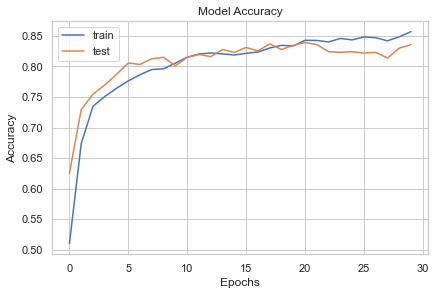

In [121]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [122]:
y_pred=model.predict(x_test)
y_pred

array([[4.3047785e-05, 1.4868981e-06, 9.9840575e-01, 7.6814892e-08,
        1.5496095e-03],
       [3.2352258e-03, 1.2257221e-04, 5.8085507e-01, 3.1157165e-06,
        4.1578400e-01],
       [1.8427214e-05, 3.2031724e-09, 1.3326879e-02, 3.6938783e-07,
        9.8665434e-01],
       ...,
       [1.0482338e-02, 4.6922029e-03, 4.3856476e-02, 2.8451643e-05,
        9.4094050e-01],
       [4.7373106e-03, 2.1998074e-03, 2.5270579e-02, 3.3468907e-04,
        9.6745759e-01],
       [4.1549954e-01, 1.3941193e-01, 9.6057341e-02, 3.0889055e-01,
        4.0140651e-02]], dtype=float32)

Text(0, 0.5, 'True Positive Rate')

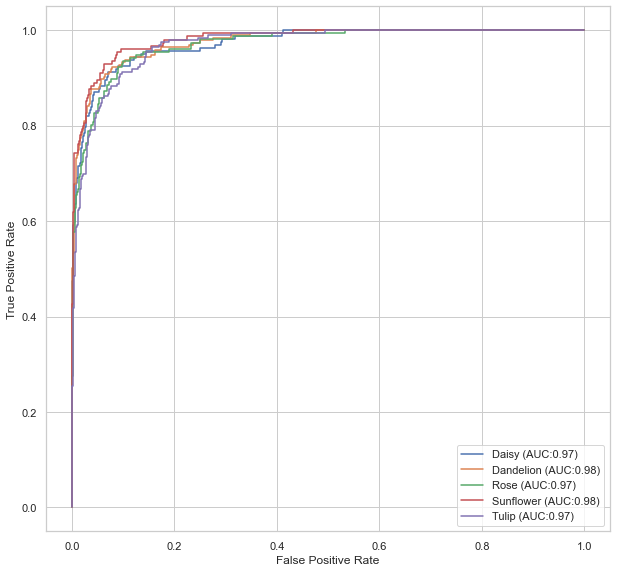

In [123]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for i in range(5):
    fpr, tpr, thresholds = roc_curve(y_test[:,i].astype(int), y_pred[:,i])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (le.inverse_transform([i])[0], auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

In [124]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred)

0.9740216242635302

In [ ]:
# Other

In [ ]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.applications import InceptionV3